# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 585


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}{city}&appid={weather_api_key}&units=imperial"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try: 
        
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | katsuren-haebaru
Processing Record 2 of Set 1 | port mathurin
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | geretsried
Processing Record 5 of Set 1 | blackmans bay
Processing Record 6 of Set 1 | anadyr
Processing Record 7 of Set 1 | guerrero negro
Processing Record 8 of Set 1 | kodiak
Processing Record 9 of Set 1 | bethel
Processing Record 10 of Set 1 | uturoa
Processing Record 11 of Set 1 | tabuk
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | tommot
Processing Record 14 of Set 1 | perelyub
Processing Record 15 of Set 1 | la ronge
Processing Record 16 of Set 1 | tiksi
Processing Record 17 of Set 1 | ambovombe
Processing Record 18 of Set 1 | wailua homesteads
Processing Record 19 of Set 1 | puerto deseado
Processing Record 20 of Set 1 | stanley
Processing Record 21 of Set 1 | longyearbyen
Processing Record 22 of Set 1 | constitucion
Proc

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,katsuren-haebaru,26.3369,127.8719,79.09,95,20,6.91,JP,1731184160
1,port mathurin,-19.6833,63.4167,75.72,88,35,16.17,MU,1731184162
2,adamstown,-25.0660,-130.1015,73.29,87,99,19.86,PN,1731184164
3,geretsried,47.8578,11.4805,40.28,94,81,0.92,DE,1731184166
4,blackmans bay,-43.0167,147.3167,51.93,73,88,1.99,AU,1731184168


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,katsuren-haebaru,26.3369,127.8719,79.09,95,20,6.91,JP,1731184160
1,port mathurin,-19.6833,63.4167,75.72,88,35,16.17,MU,1731184162
2,adamstown,-25.0660,-130.1015,73.29,87,99,19.86,PN,1731184164
3,geretsried,47.8578,11.4805,40.28,94,81,0.92,DE,1731184166
4,blackmans bay,-43.0167,147.3167,51.93,73,88,1.99,AU,1731184168


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

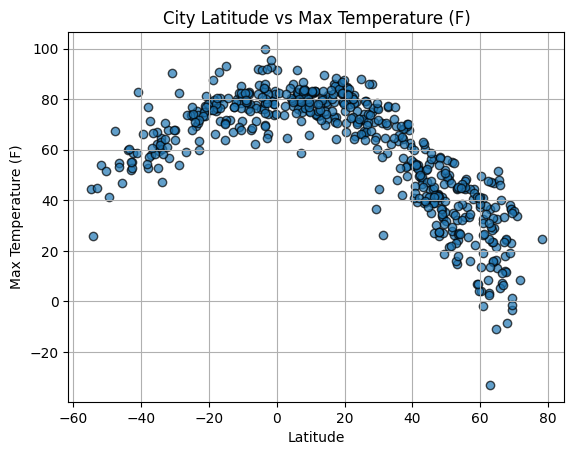

In [19]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values, alpha=0.7 ,edgecolors="k")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f"City Latitude vs Max Temperature (F)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

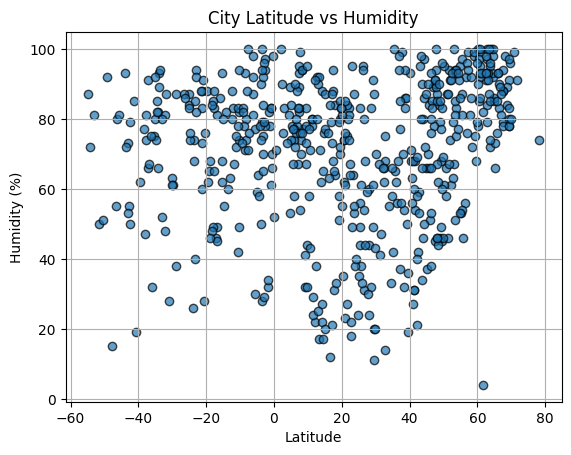

In [23]:
# Build the scatter plots for latitude vs. humidity
x_valuesH = city_data_df['Lat']
y_valuesH = city_data_df['Humidity']
plt.scatter(x_valuesH,y_valuesH, alpha=0.7 ,edgecolors="k")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"City Latitude vs Humidity")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

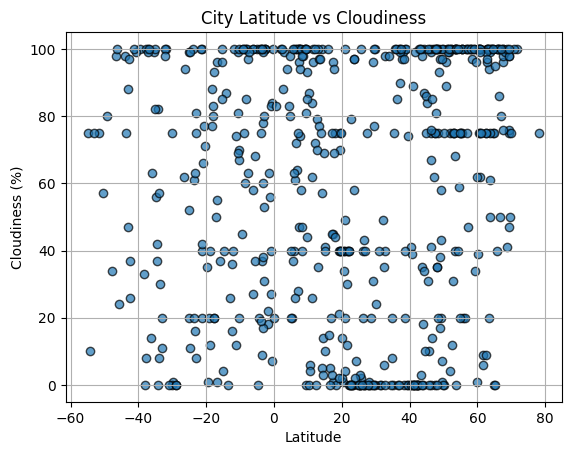

In [25]:
# Build the scatter plots for latitude vs. cloudiness
x_valuesC = city_data_df['Lat']
y_valuesC = city_data_df['Cloudiness']
plt.scatter(x_valuesC,y_valuesC, alpha=0.7 ,edgecolors="k")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"City Latitude vs Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

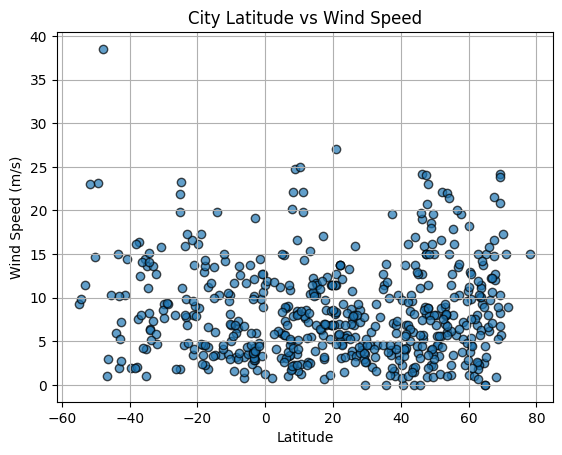

In [27]:
# Build the scatter plots for latitude vs. wind speed
x_valuesW = city_data_df['Lat']
y_valuesW = city_data_df['Wind Speed']
plt.scatter(x_valuesW,y_valuesW, alpha=0.7 ,edgecolors="k")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title(f"City Latitude vs Wind Speed")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [48]:
# Define a function to create Linear Regression plots
def lin_regress_plot(x,y):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y, alpha=0.7 ,edgecolors="k")
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
    print(f"The r^2-value is: {rvalue**2}")



In [49]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,katsuren-haebaru,26.3369,127.8719,79.09,95,20,6.91,JP,1731184160
3,geretsried,47.8578,11.4805,40.28,94,81,0.92,DE,1731184166
5,anadyr,64.7500,177.4833,21.70,92,75,4.47,RU,1731184170
6,guerrero negro,27.9769,-114.0611,74.93,24,0,7.18,MX,1731183893
7,kodiak,57.7900,-152.4072,40.51,81,100,19.57,US,1731184174


In [50]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port mathurin,-19.6833,63.4167,75.72,88,35,16.17,MU,1731184162
2,adamstown,-25.0660,-130.1015,73.29,87,99,19.86,PN,1731184164
4,blackmans bay,-43.0167,147.3167,51.93,73,88,1.99,AU,1731184168
9,uturoa,-16.7333,-151.4333,80.38,81,96,11.27,PF,1731184178
11,port-aux-francais,-49.3500,70.2167,41.22,92,80,23.13,TF,1731184182


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.7724536330342487


<function matplotlib.pyplot.show(close=None, block=None)>

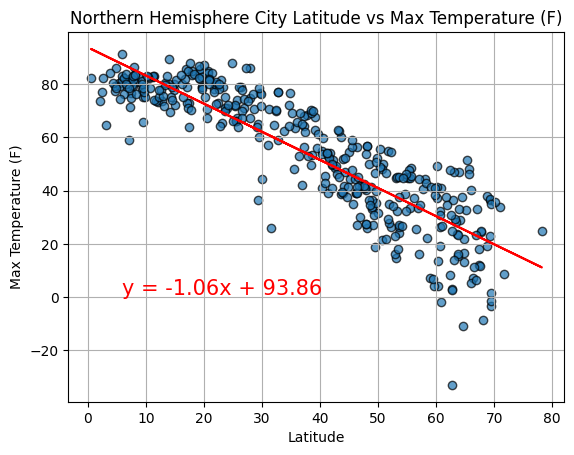

In [ ]:
# Linear regression on Northern Hemisphere
x_values_nh = northern_hemi_df['Lat']
y_values_nh = northern_hemi_df['Max Temp']
lin_regress_plot(x_values_nh, y_values_nh)


# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f"Northern Hemisphere City Latitude vs Max Temperature (F)")
plt.grid(True)
plt.show

The r^2-value is: 0.5713736443286025


<function matplotlib.pyplot.show(close=None, block=None)>

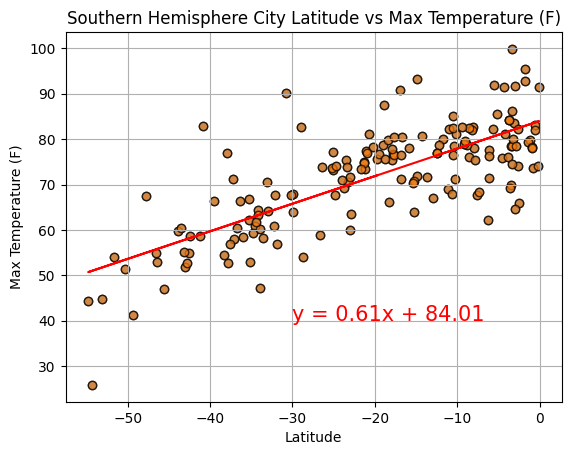

In [66]:
# Linear regression on Southern Hemisphere
x_values_sh = southern_hemi_df['Lat']
y_values_sh = southern_hemi_df['Max Temp']
lin_regress_plot(x_values_sh, y_values_sh)
plt.scatter(x_values_sh,y_values_sh, color="C1", alpha=0.7 ,edgecolors="k")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_sh, y_values_sh)
regress_values = x_values_sh * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f"Southern Hemisphere City Latitude vs Max Temperature (F)")
plt.grid(True)
plt.show

**Discussion about the linear relationship:** The linear relationship for Latitude vs Max Temperature (F) shows a strong correlation that as the latitude value moves closer to 0, or the equator, the max temperature increase. As the latitude value moves away from 0 (positive values in the northen hemisphere, negative values in the southern hemisphere) the max temperature decreases.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.08840687165634815


<function matplotlib.pyplot.show(close=None, block=None)>

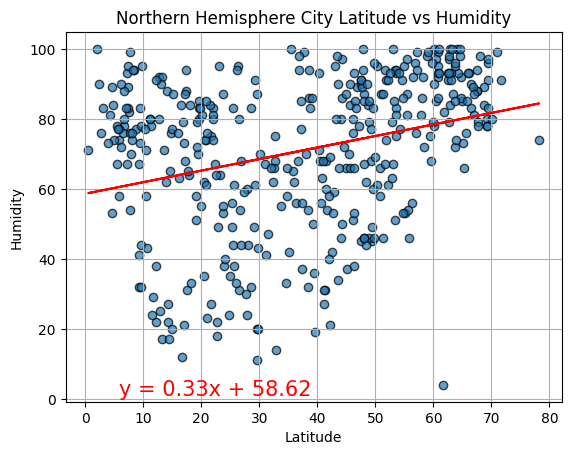

In [53]:
# Northern Hemisphere
x_values_nh = northern_hemi_df['Lat']
y_values_nh = northern_hemi_df['Humidity']
lin_regress_plot(x_values_nh, y_values_nh)


# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f"Northern Hemisphere City Latitude vs Humidity")
plt.grid(True)
plt.show

The r^2-value is: 0.009934741720391601


<function matplotlib.pyplot.show(close=None, block=None)>

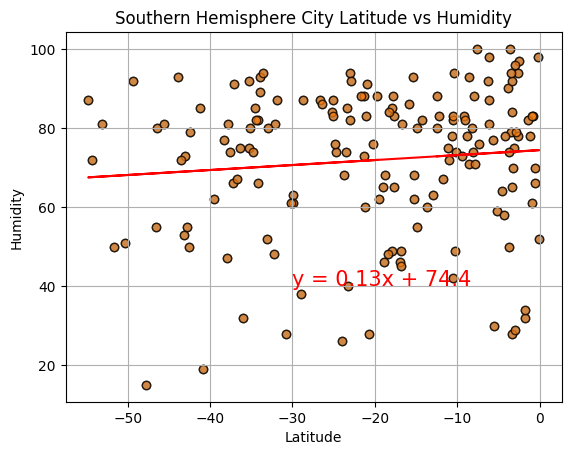

In [67]:
# Southern Hemisphere
x_values_sh = southern_hemi_df['Lat']
y_values_sh = southern_hemi_df['Humidity']
lin_regress_plot(x_values_sh, y_values_sh)
plt.scatter(x_values_sh,y_values_sh, color="C1", alpha=0.7 ,edgecolors="k")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_sh, y_values_sh)
regress_values = x_values_sh * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f"Southern Hemisphere City Latitude vs Humidity")
plt.grid(True)
plt.show

**Discussion about the linear relationship:** The linear relationship for Latitude vs Humidity does not show a strong correlation between the values. Humidity appears more frequently on the higher end of the values (100-80), but also has many values in the lower range (60-20). Humidity is likely caused by different environmental/geographical features of the cities, and does not appear to be majorly impacted by latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.03834626805459259


<function matplotlib.pyplot.show(close=None, block=None)>

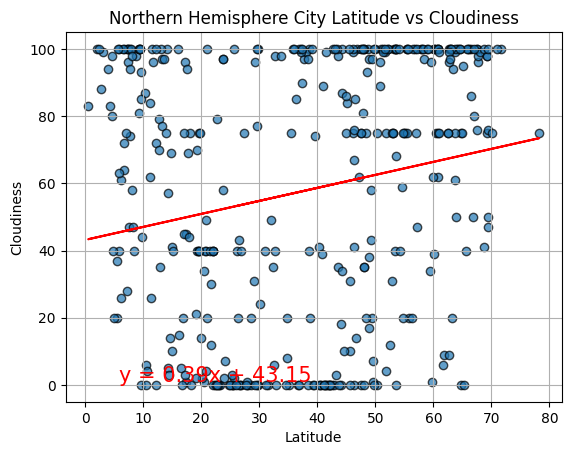

In [68]:
# Northern Hemisphere
x_values_nh = northern_hemi_df['Lat']
y_values_nh = northern_hemi_df['Cloudiness']
lin_regress_plot(x_values_nh, y_values_nh)


# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f"Northern Hemisphere City Latitude vs Cloudiness")
plt.grid(True)
plt.show

The r^2-value is: 0.0005647628109115371


<function matplotlib.pyplot.show(close=None, block=None)>

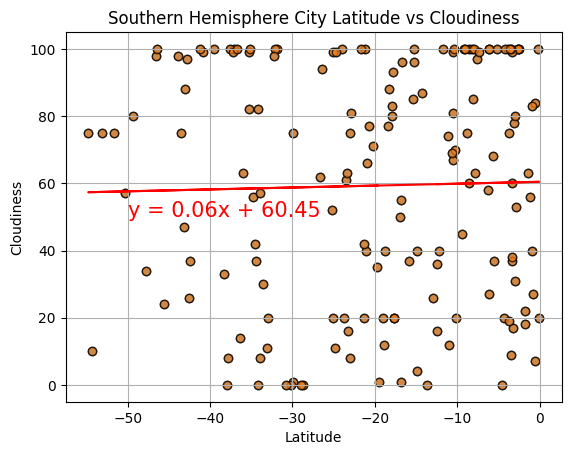

In [72]:
# Southern Hemisphere
x_values_sh = southern_hemi_df['Lat']
y_values_sh = southern_hemi_df['Cloudiness']
lin_regress_plot(x_values_sh, y_values_sh)
plt.scatter(x_values_sh,y_values_sh, color="C1", alpha=0.7 ,edgecolors="k")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_sh, y_values_sh)
regress_values = x_values_sh * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-50,50),fontsize=15,color="red")
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f"Southern Hemisphere City Latitude vs Cloudiness")
plt.grid(True)
plt.show

**Discussion about the linear relationship:** The linear relationship for Latitude vs Cloudiness does not show a strong correlation between the values. Cloudiness appears very frequently at the max (100) and the minimum (0), particulary in the Northen Hemisphere. Cloudiness is likely caused by different environmental/geographical features of the cities, and does not appear to be majorly impacted by latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.012475164315587583


<function matplotlib.pyplot.show(close=None, block=None)>

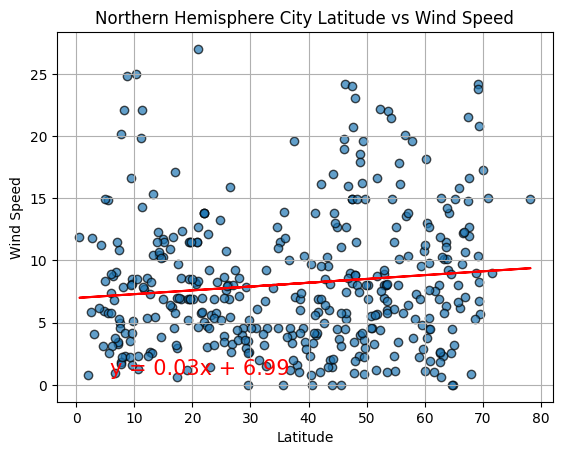

In [73]:
# Northern Hemisphere
x_values_nh = northern_hemi_df['Lat']
y_values_nh = northern_hemi_df['Wind Speed']
lin_regress_plot(x_values_nh, y_values_nh)


# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title(f"Northern Hemisphere City Latitude vs Wind Speed")
plt.grid(True)
plt.show

The r^2-value is: 0.07198728698135656


<function matplotlib.pyplot.show(close=None, block=None)>

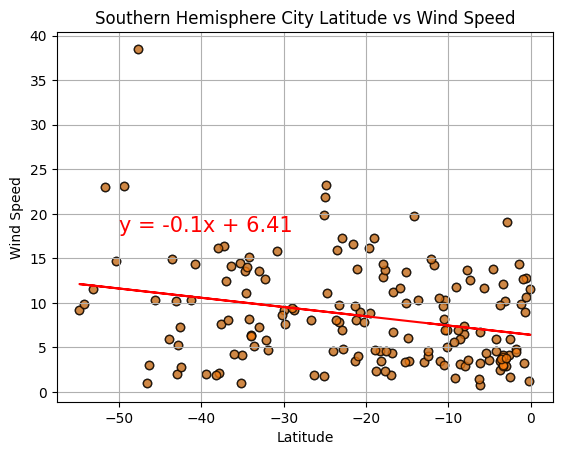

In [75]:
# Southern Hemisphere
x_values_sh = southern_hemi_df['Lat']
y_values_sh = southern_hemi_df['Wind Speed']
lin_regress_plot(x_values_sh, y_values_sh)
plt.scatter(x_values_sh,y_values_sh, color="C1", alpha=0.7 ,edgecolors="k")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_sh, y_values_sh)
regress_values = x_values_sh * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-50,18),fontsize=15,color="red")
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title(f"Southern Hemisphere City Latitude vs Wind Speed")
plt.grid(True)
plt.show

**Discussion about the linear relationship:** The linear relationship for Latitude vs Wind Speed does not show a strong correlation between the values. Wind Speed plots for cities appear frequently across the range of values, with a few outliers at high points. Wind Speed is likely caused by different environmental/geographical features of the cities, and does not appear to be majorly impacted by latitude.